In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/hotel_bookings.csv")


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.drop(columns=["company","agent"],inplace=True)

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr                      

In [ ]:
# total no.of reservations in hotels
df["hotel"].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
# no.of reservations canceled or not
df["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
# percentage of cancellations in city and resort hotel

data=pd.crosstab(df["is_canceled"],df["hotel"],normalize="columns")*100
data




hotel,City Hotel,Resort Hotel
is_canceled,,
0,58.273037,72.236645
1,41.726963,27.763355


In [ ]:
df[df["hotel"]=="Resort Hotel"]["is_canceled"].value_counts()

0    28938
1    11122
Name: is_canceled, dtype: int64

In [ ]:
df["lead_time"].value_counts().head(10)

0     6345
1     3460
2     2069
3     1816
4     1715
5     1565
6     1445
7     1331
8     1138
12    1079
Name: lead_time, dtype: int64

In [ ]:
df["children"].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
df["meal"].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
# types of market segment
df["market_segment"].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
df["deposit_type"].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
# reservations acc to room type
df["reserved_room_type"].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
# types of customer
df["customer_type"].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
df["reservation_status"].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [ ]:
# reservations in different countries

df["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
df["meal"].replace("Undefined","SC",inplace=True)


In [ ]:
# inaccurate data

subset=df[(df["adults"]==0 )& (df["babies"]==0 )& (df["children"]==0)]
subset[["adults","babies","children"]]
deleted=(df["adults"]==0 )& (df["babies"]==0 )& (df["children"]==0)
df=df[~deleted]


In [ ]:
df=df[df["adr"]<5000]

Text(0.5, 1.0, 'reservations status count')

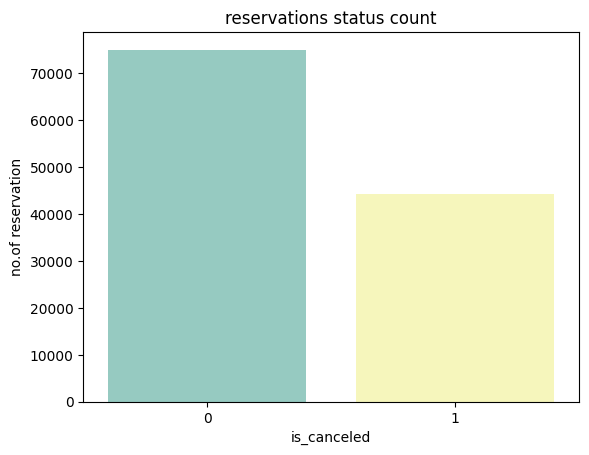

In [ ]:
# no.of reservations cancelled or not
sns.countplot(data=df,x="is_canceled",palette="Set3")
plt.ylabel("no.of reservation")
plt.title("reservations status count")




Text(0.5, 1.0, 'reservation status of different hotel')

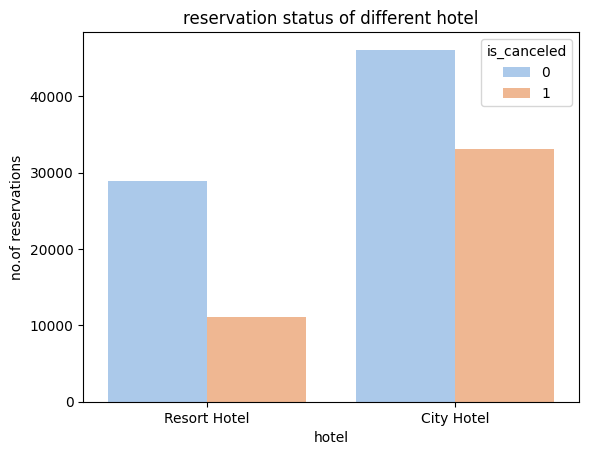

In [ ]:
# cancellations in resort and city hotel

sns.countplot(data=df,x="hotel",hue="is_canceled",palette="pastel")
plt.ylabel("no.of reservations")
plt.title("reservation status of different hotel")

In [ ]:
# new column-"month"

df["month"]=pd.to_datetime(df["reservation_status_date"]).dt.month_name()


In [ ]:
df.drop(columns=["arrival_date_month"],inplace=True)

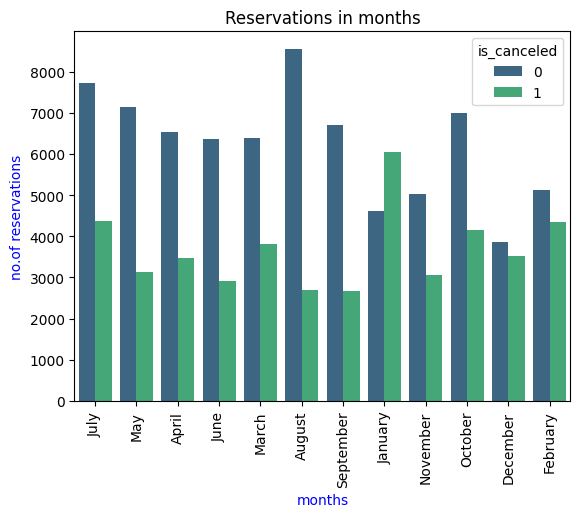

In [ ]:
# reservations in different months
sns.countplot(data=df,x="month",hue="is_canceled",palette="viridis")
plt.xticks(rotation="vertical")
plt.xlabel("months",color="blue")
plt.ylabel("no.of reservations",color="blue")
plt.title("Reservations in months")
plt.show()

Most of the reservations were canceled in month of january and february and were confirmed in month of august and september




In [ ]:
# reservation confirmed data
df_n=df[df["is_canceled"]==0]
# reservation canceled data
df_y=df[df["is_canceled"]==1]
df_canceled=df_y.groupby("month")[["adr"]].sum().reset_index()

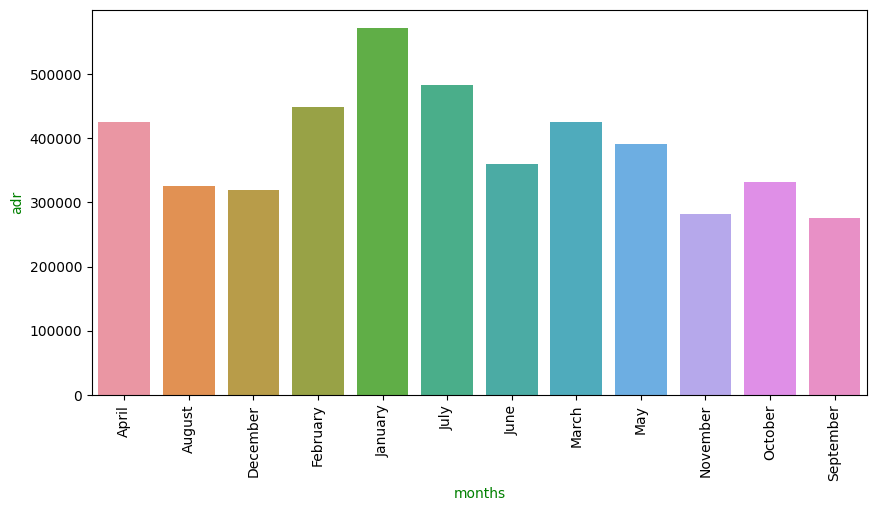

In [ ]:
# Sum of Average daily Rate of cancelled reservations in differnet months

plt.figure(figsize=(10,5))
sns.barplot(data=df_canceled,x="month",y="adr")
plt.xticks(rotation="vertical")
plt.xlabel("months",color="green")
plt.ylabel("adr",color="green")

plt.show()



In month of january and february adr is highest when the most of reservations are cancelled

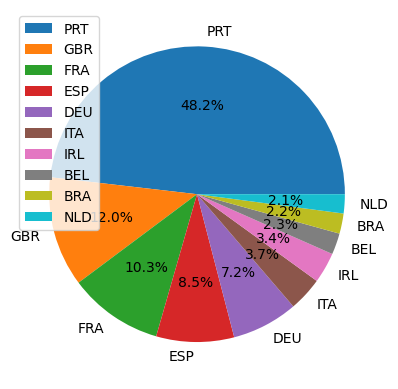

In [ ]:
#where do the guest come from?
# top_10 countries

top_10=df["country"].value_counts()[:10]

plt.pie(top_10.values,autopct='%1.1f%%',labels=top_10.index)
plt.legend()
plt.show()

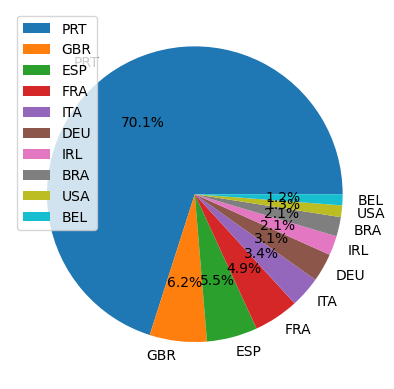

In [ ]:
# top 10 countries with maximum cancellations

top_10=df_y["country"].value_counts()[:10]
plt.pie(top_10.values,autopct='%1.1f%%',labels=top_10.index)
plt.legend()
plt.show()

Most of the guest are from portugal and other countries in Europe and also maximum no.of cancellations are also from portugal

In [ ]:
list=df["days_in_waiting_list"].value_counts().head(10).index.to_list()
df_new=df[df["days_in_waiting_list"].isin(list)]


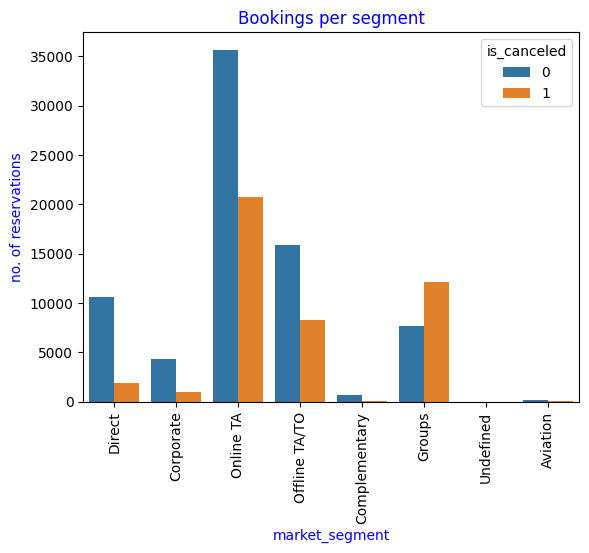

In [ ]:
# Bookings per market segment
sns.countplot(df,x="market_segment",hue="is_canceled")
plt.xticks(rotation="vertical")
plt.xlabel("market_segment",color="blue")
plt.ylabel("no. of reservations",color="blue")
plt.title("Bookings per segment",color="blue")
plt.show()



In [ ]:
# percentage of people not getting reserved room type
(df.shape[0]-df[df["reserved_room_type"]==df["assigned_room_type"]].shape[0])/df.shape[0]*100


12.411814544203876

In [ ]:
df_x=df[~(df["reserved_room_type"]==df["assigned_room_type"])]
df_x["is_canceled"].value_counts()
(801/13995)*100


5.723472668810289

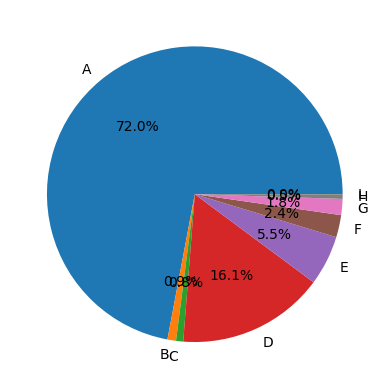

In [ ]:
# reservations acc to room_type
room_type=df.groupby("reserved_room_type")["reserved_room_type"].count()
plt.pie(room_type,labels=room_type.index,autopct='%1.1f%%')
plt.show()

In [ ]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [ ]:
df["reservation_status_date"].value_counts()

2015-10-21    1460
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64

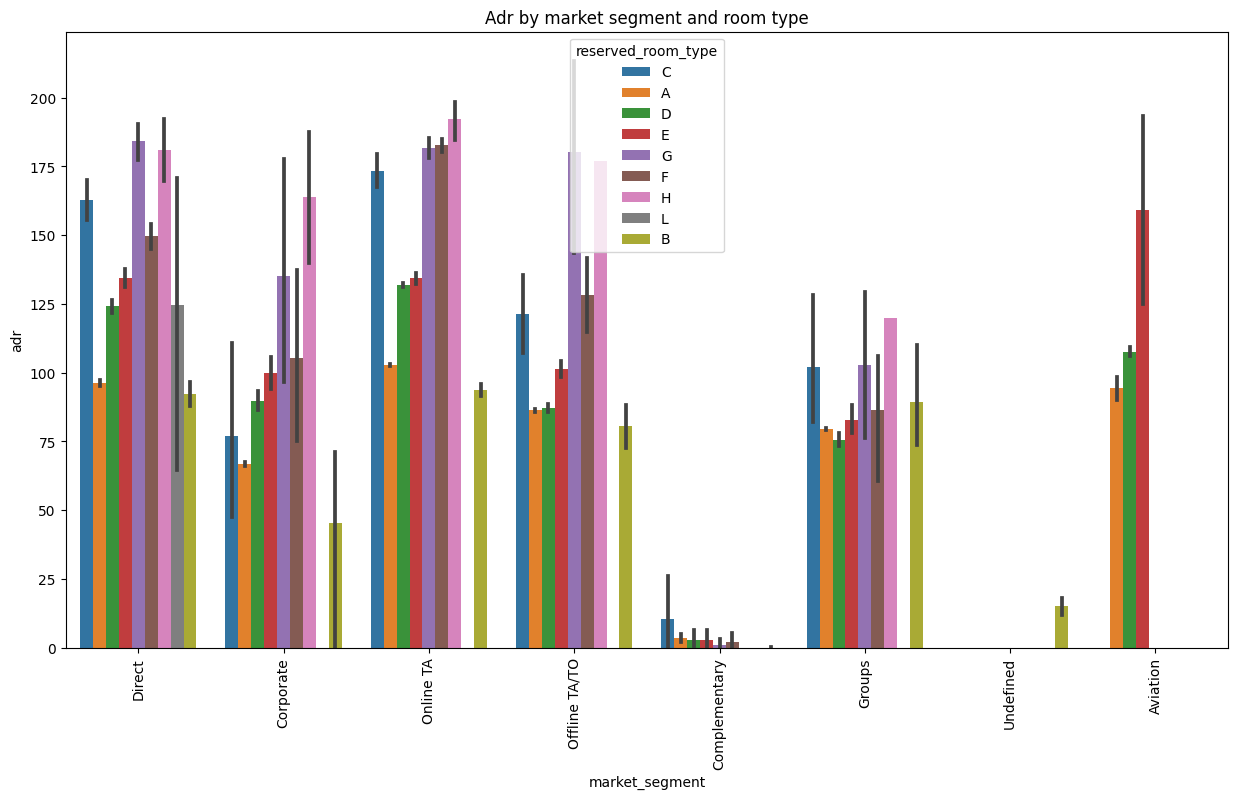

In [ ]:
# Adr by market segment and room type
fig,ax= plt.subplots(figsize=(15,8))
sns.barplot(df,x="market_segment",y="adr",hue="reserved_room_type",ax=ax)
plt.xticks(rotation="vertical")
plt.title("Adr by market segment and room type")
plt.show()


In [ ]:
# Adr of resort and city hotel over a period of time
resort_hotel=df[df["hotel"]=="Resort Hotel"]
city_hotel=df[df["hotel"]=="City Hotel"]


resort_price=resort_hotel.groupby("reservation_status_date")[["adr"]].mean().reset_index()
city_price=city_hotel.groupby("reservation_status_date")[["adr"]].mean().reset_index()

resort_price["reservation_status_date"]=pd.to_datetime(resort_price["reservation_status_date"])

city_price["reservation_status_date"]=pd.to_datetime(city_price["reservation_status_date"])
resort_price=resort_price.sort_values("reservation_status_date")
city_price=city_price.sort_values("reservation_status_date")





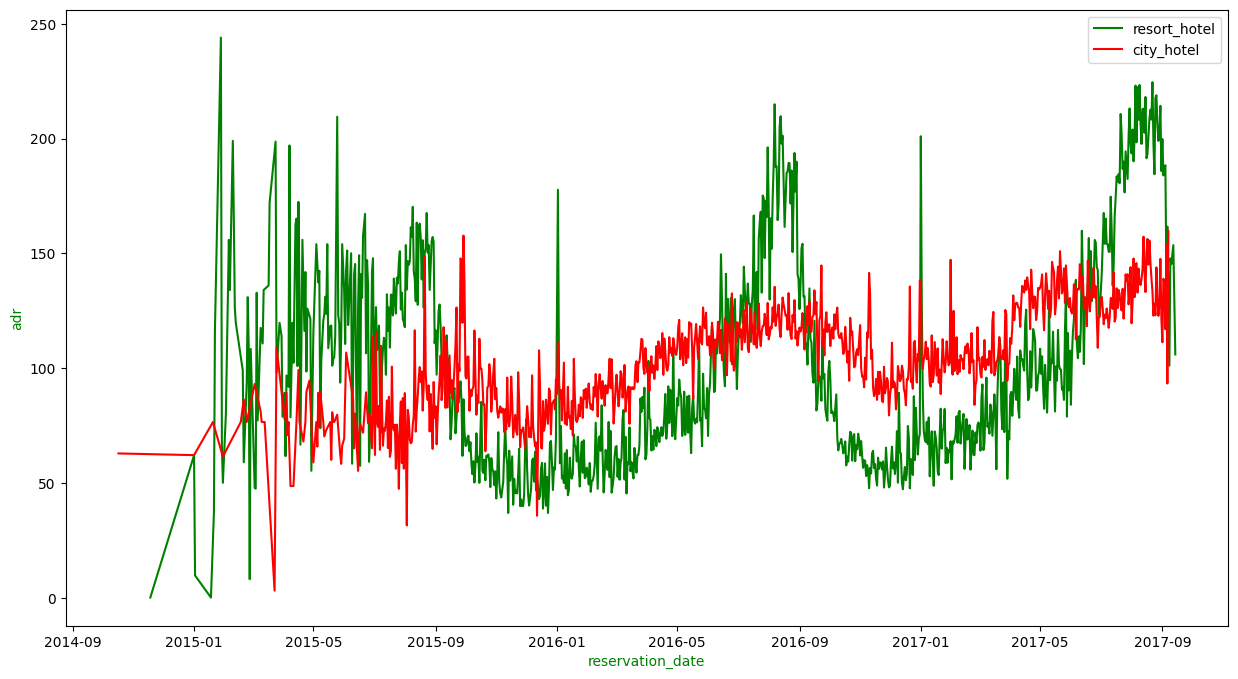

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(resort_price["reservation_status_date"],resort_price["adr"],label="resort_hotel",color="green")
plt.plot(city_price["reservation_status_date"],city_price["adr"],label="city_hotel",color="red")
plt.xlabel("reservation_date",color="green")
plt.ylabel("adr",color="green")
plt.legend()
plt.show()

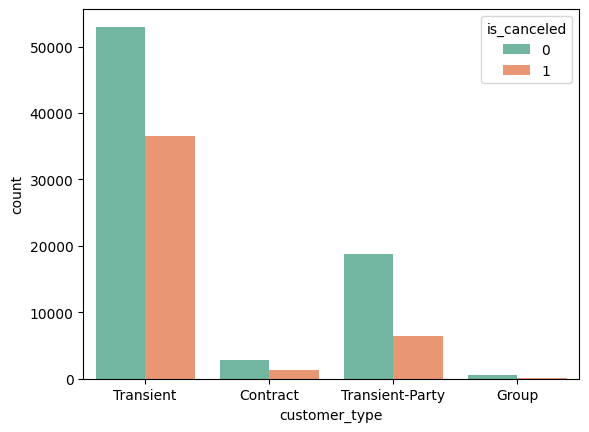

In [ ]:
# customer_type

sns.countplot(df,x="customer_type",hue="is_canceled",palette="Set2")
plt.show()

In [ ]:
# Effect of adr on cancellations


df_yes=df_y.groupby("reservation_status_date")[["adr"]].mean().reset_index()
df_not=df_n.groupby("reservation_status_date")[["adr"]].mean().reset_index()
df_yes["reservation_status_date"]=pd.to_datetime(df_yes["reservation_status_date"])
df_not["reservation_status_date"]=pd.to_datetime(df_not["reservation_status_date"])
df_yes=df_yes.sort_values("reservation_status_date")
df_not=df_not.sort_values("reservation_status_date")


Text(0.5, 1.0, 'Average daily rates in hotels')

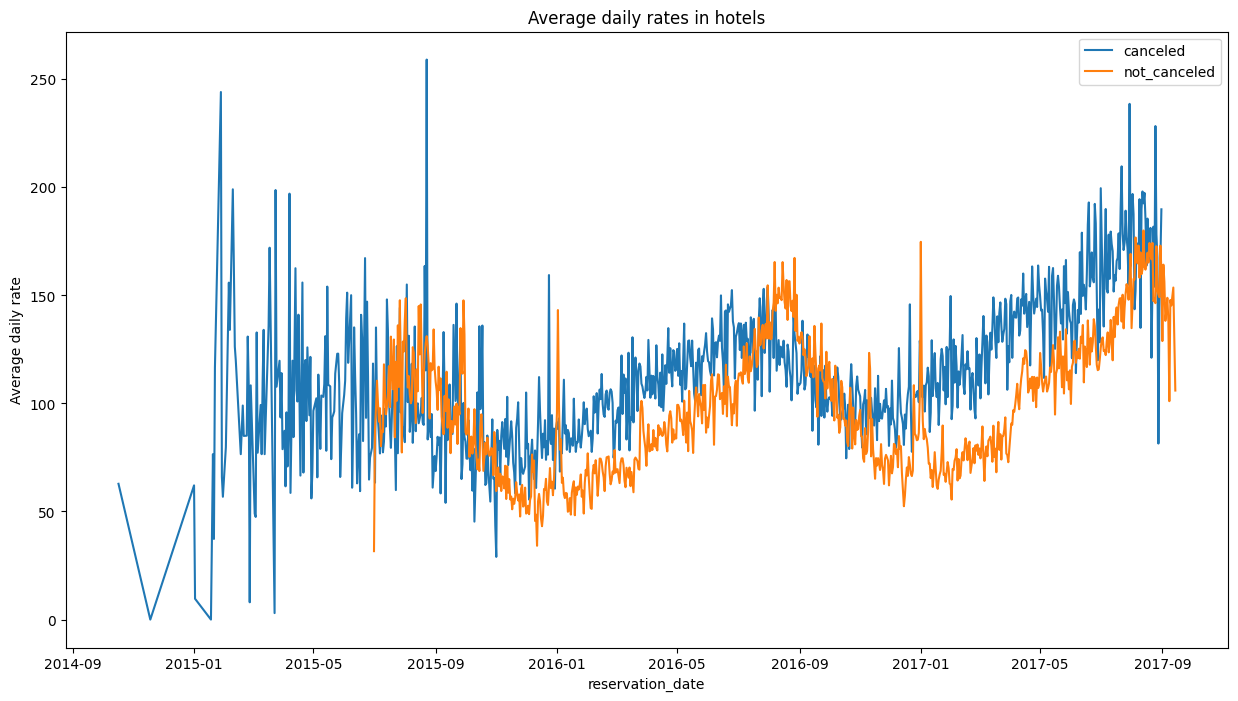

In [ ]:

plt.figure(figsize=(15,8))
plt.plot(df_yes["reservation_status_date"],df_yes["adr"],label="canceled")
plt.plot(df_not["reservation_status_date"],df_not["adr"],label="not_canceled")
plt.legend()
plt.xlabel("reservation_date")
plt.ylabel("Average daily rate")
plt.title("Average daily rates in hotels")

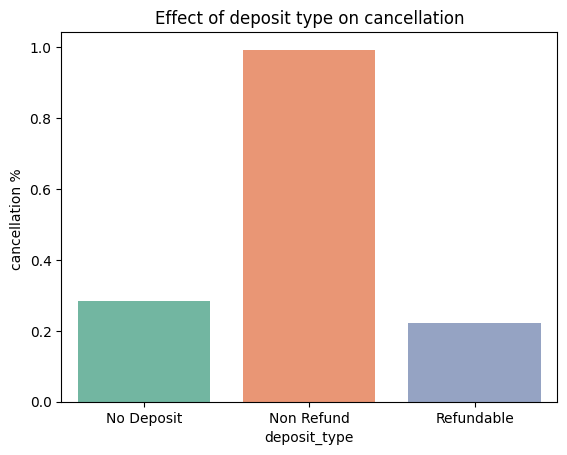

In [ ]:
# effect of deposit type on cancellations
deposit_canceled_data=df.groupby("deposit_type")["is_canceled"].describe()
sns.barplot(deposit_canceled_data,x=deposit_canceled_data.index,y=deposit_canceled_data["mean"],palette="Set2")
plt.ylabel("cancellation % ")
plt.title("Effect of deposit type on cancellation")
plt.show()


In [ ]:
print(pd.crosstab(df["is_repeated_guest"],df["is_canceled"],normalize="index")*100)
# percentage of repeated_guest who canceled the reservations
#==14%
# percentage of non repeated guest who canceled the reservations
#==37%
# people who have not previously booked any reservations cancelled most


is_canceled                0          1
is_repeated_guest                      
0                  62.194467  37.805533
1                  85.352863  14.647137


In [ ]:
df['required_car_parking_spaces'].value_counts()
# this shows that required car parking spaces is almost zero

0    111800
1      7376
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

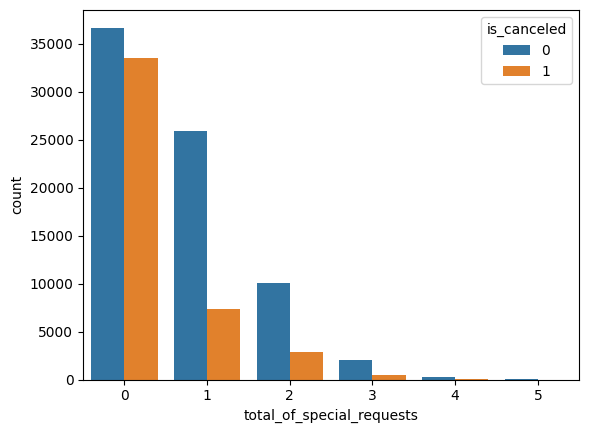

In [ ]:
# reservations with special requests
sns.countplot(df,x='total_of_special_requests',hue="is_canceled")
plt.show()
# this shows special requests are lesser in number but reservations with special requests are less likely to get cancelled

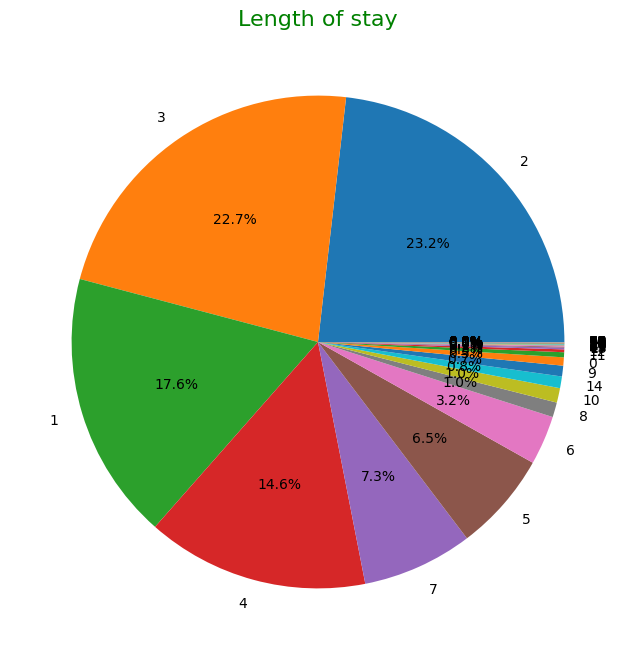

In [ ]:
# how long do guests stay?
df["total_nights"]=df["stays_in_week_nights"]+df['stays_in_weekend_nights']
people_stay=df["total_nights"].value_counts()/df["total_nights"].count()*100
# percentage of guests who stays at hotel
fig,ax=plt.subplots(figsize=(15,8))
ax=plt.pie(people_stay,autopct='%1.1f%%',labels=people_stay.index)
plt.title("Length of stay",fontsize=16,color="green")
plt.show()

            count      mean       std  min  25%  50%  75%  max
lead_time                                                     
0          6264.0  0.066571  0.249297  0.0  0.0  0.0  0.0  1.0
1          3445.0  0.092308  0.289502  0.0  0.0  0.0  0.0  1.0
2          2065.0  0.103148  0.304225  0.0  0.0  0.0  0.0  1.0
3          1815.0  0.100275  0.300450  0.0  0.0  0.0  0.0  1.0
4          1710.0  0.102339  0.303182  0.0  0.0  0.0  0.0  1.0
...           ...       ...       ...  ...  ...  ...  ...  ...
622          17.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
626          30.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
629          17.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
709           1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
737           1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0

[479 rows x 8 columns]


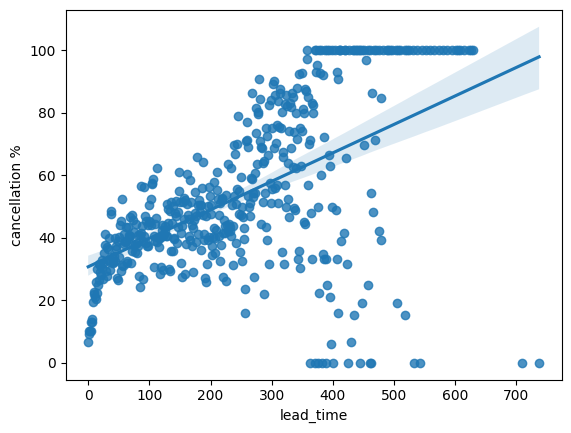

In [ ]:
# Effect of lead time on cancellations
lead_time=df.groupby("lead_time")["is_canceled"].describe()
print(lead_time)
sns.regplot(lead_time,x=lead_time.index,y=lead_time["mean"]*100)
plt.ylabel("cancellation %")
plt.show()
#Bookings made a few days before the arrival date are rarely canceled, whereas bookings made over
#one year in advance are canceled very often.